<a href="https://colab.research.google.com/github/italo-venancio/etapa02_prova01_estruturas_de_dados/blob/main/etapa2_prova1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de ordenação** 

# Insertion Sort
O insertion sort não é considerado um algoritmo muito rápido, tendo em vista que ele possui um loop dentro de outro em sua implementação, isso faz com que ele apresente complexidade exponencial, ou seja, O(n**2). Entretanto, ele pode ser útil para ordenar conjuntos de dados relativamente pequenos.

Seu funcionamento compreende percorrer o vetor de entrada tendo um número como marcador, ele determina o lado que já está ordenado, e o que ainda está por ordenar. O marcador vai sendo comparado a cada item até encontrar o local correto na sequência, depois disso, o item seguinte se torna o novo marcador.


In [ ]:
def insertion_sort(vetor):
  n = len(vetor)

  for i in range(n):
    marcador = vetor[i]
    j = i-1
    while j >= 0 and marcador < vetor[j]:
      vetor[j+1] = vetor [j]
      j -= 1
    vetor[j+1]=marcador
  return vetor

# Merge Sort
O merge sort caracteriza-se por separar o vetor pela metade múltiplas vezes, até o tamanho mínimo ser atingido, então, os subvetores vão sendo combinados através de comparações entre os itens até formar-se o vetor de saída com os itens ordenados. 
Essa abordagem é recursiva, e segue o conceito de dividir para conquistar, porque divide a tarefa em partes menores. É bastante eficiente com grandes conjuntos de dados.
Sua complexidade é de O(n log n), pois o algoritmo acessa cada item para cada mescla entre os subvetores.

In [ ]:
def merge_sort(vetor):
  # sao passados o vetor, o indice inicial, e o indice final
  merge_sort2(vetor, 0, len(vetor)-1)

def merge_sort2(vetor, primeiro, ultimo):
  # se o vetor tem mais de um item
  if primeiro < ultimo:
    # divide-se o vetor ao meio
    meio = (primeiro + ultimo) // 2
    merge_sort2(vetor, primeiro, meio)
    merge_sort2(vetor, meio+1, ultimo)
    # combina-se as metades
    merge(vetor, primeiro, meio, ultimo)

def merge(vetor, primeiro, meio, ultimo):
  n1 = meio - primeiro + 1
  n2 = ultimo - meio

  # vetores temporarios
  esquerda = [0] * (n1)
  direita = [0] * (n2)

  # copiar itens para vetores temporarios
  for i in range(0, n1):
    esquerda[i] = vetor[primeiro + i]

  for j in range(0, n2):
    direita[j] = vetor[meio + 1 + j]

  # indice inicial dos subvetores
  i = j = 0
  # indice inicial do subvetor mesclado
  k = primeiro

  while i < n1 and j < n2:
    if esquerda[i] <= direita[j]:
      vetor[k] = esquerda[i]
      i += 1
    else: 
      vetor[k] = direita[j]
      j += 1
    k += 1

  # copiar itens restantes dos subvetores, se houver
  while i < n1:
    vetor[k] = esquerda[i]
    i += 1
    k += 1

  while j < n2:
    vetor[k] = direita[j]
    j += 1
    k += 1

# Quick Sort
O algoritmo quick sort segue o conceito de dividir para conquistar, sendo eficiente para grandes conjuntos de dados. Sua complexidade média é de O(n log n). No pior caso, sua complexidade é de O(n**2).

Seleciona-se um pivô entre os itens, podendo ser o primeiro item no vetor, o último item, um valor mediano entre eles, ou ainda pode ser selecionado de modo aleatório. Ele é usado como uma referência para separar o vetor e para ser comparado com os itens, ao fim das comparações, os itens que estão à esquerda são menores que o pivô, e os que estão à direita são maiores.
Por meio de recursão, o processo se repete até que todos os itens sejam ordenados. A performance do algoritmo depende da forma como o pivô é selecionado, o ideal é que esse pivô esteja próximo ao meio na ordem numérica dos valores.

In [ ]:
def quick_sort(vetor):
	quick_sort2(vetor, 0, len(vetor)-1)
	
def quick_sort2(vetor, esquerda, direita):
	# se ha mais de um item para ser ordenado
	if esquerda < direita:
		p = particao(vetor, esquerda, direita)
		quick_sort2(vetor, esquerda, p - 1)
		quick_sort2(vetor, p + 1, direita)

# calcula-se o indice do pivo mais apropriado
def seleciona_pivo(vetor, esquerda, direita):
	meio = (direita + esquerda) // 2
	pivo = direita
	if vetor[esquerda] < vetor[meio]:
		if vetor[meio] < vetor[direita]:
			pivo = meio
	elif vetor[esquerda] < vetor[direita]:
		pivo = esquerda
		
	return pivo

def particao(vetor, esquerda, direita):
	indice_pivo = seleciona_pivo(vetor, esquerda, direita)
	valor_pivo = vetor[indice_pivo]
	vetor[indice_pivo], vetor[esquerda] = vetor[esquerda], vetor[indice_pivo]
	# borda eh uma variavel de controle 
	# para indicar os numeros que ja foram comparados ao pivo 
	borda = esquerda

	for i in range(esquerda, direita+1):
		if vetor[i] < valor_pivo:
			borda += 1
			vetor[i], vetor[borda] = vetor[borda], vetor[i]
	vetor[esquerda], vetor[borda] = vetor[borda], vetor[esquerda]

	return (borda)

# Bucket Sort
No bucket sort, os elementos são separados em vários grupos chamados buckets. Cada bucket é ordenado individualmente usando outros algoritmos ou usando o próprio bucket sort por meio de recursão. Depois disso, os elementos ordenados nos buckets são reagrupados em um único vetor. 

Os buckets se baseiam no alcance, dependendo do maior e do menor número dentro do vetor. Esse algoritmo é recomendado quando os dados de entrada estão distribuídos uniformemente dentro de um intervalo numérico.

A complexidade média do bucket sort é O(n + k), em que n é a quantidade de elementos no vetor, e k é a quantidade de buckets. No pior caso, a complexidade é O(n**2). Ele pode ser muito rápido pela forma como os elementos são organizados nos buckets, mas para isso, é necessária muita memória auxiliar.

In [ ]:
from math import floor

def bucket_sort(vetor):
    tamanho = len(vetor)
    maximo = max(vetor)
    minimo = min(vetor)
    
    # bucket_range eh o intervalo numerico aplicado em cada bucket
    bucket_range = (maximo-minimo) / tamanho
    
    # buckets eh o vetor que vai armazenar cada bucket
    buckets = []
    for i in range(tamanho+1):
        buckets.append([])
    
    # os elementos sao inseridos nos respectivos buckets
    for i in range(tamanho):
        bucket_index = floor((vetor[i]-minimo) / bucket_range)
        buckets[bucket_index].append(vetor[i])
    
    # ordenar o conteudo de cada bucket
    for i in range(len(buckets)):
        buckets[i].sort()
    
    # por fim, reagrupar os elementos ordenados no vetor original
    vetor.clear()
    for i in range(tamanho):
        for j in range(len(buckets[i])):
            vetor.append(buckets[i][j])
    return vetor

# Radix Sort
O conceito por trás do radix sort é ordenar seguindo dígito por dígito, começando do menos significante para o mais significante.

Para cada dígito, o vetor é percorrido e o item é armazenado no bucket que corresponde ao dígito referente à iteração. Depois, os números ordenados nos buckets são recolocados no vetor.

A complexidade média é O(n*d), onde n é a quantidade de elementos, e d é o comprimento do maior elemento. Ele é muito rápido em grandes listas de valores numéricos curtos, e não possui comparações na implementação.
Se os dados são números decimais, cria-se 10 buckets; se os dados são strings, cria-se 26 buckets.

In [ ]:
def radix_sort(vetor):
  # encontar o maior numero para saber o numero de digitos
  maximo = max(vetor)
  # executar contagem para cada digito
  exp = 1
  while maximo / exp >= 1:
    contagem(vetor, exp)
    exp *= 10

def contagem(vetor, exp1):
  n = len(vetor)
  # saida vai ter os elementos ordenados
  saida = [0] * (n)
  # inicializar o vetor de contagem como zero
  count = [0] * (10)

  # armazenar as ocorrencias em count
  for i in range (0, n):
    index = vetor[i] // exp1
    count[index % 10] += 1

  # count[i] vai armazenar as posicoes dos digitos na saida
  for i in range(1, 10):
    count[i] += count[i-1]

  # construir o vetor de saida
  i = n - 1
  while i >= 0:
    index = vetor[i] // exp1
    saida[count[index % 10] - 1] = vetor[i]
    count[index % 10] -= 1
    i -= 1

  i = 0
  for i in range(0, len(vetor)):
    vetor[i] = saida[i]

# Funções auxiliares

In [ ]:
"""
Funcao para gerar vetor de numeros aleatorios
os numeros sao selecionados dentro de um intervalo duas vezes maior que o tamanho fornecido
"""
import random

def gerar_vetor(n):
  nums = [random.randint(0, 2*(10**n)) for _ in range(10**n)]

  return nums 

In [ ]:
"""
Funcao para executar os algoritmos
recebe o nome do algoritmo que sera utilizado
recebe o numero expoente que sera aplicado a base 10 para determinar o tamanho do vetor
retorna o tempo que o algoritmo levou para ordenar os numeros
"""
import time

def executar_algoritmo_ordenacao(algoritmo, tamanho):
  vetor = gerar_vetor(tamanho)
  start = time.time()
  algoritmo(vetor)
  tempo_gasto = round(time.time() - start, 6)
  
  return tempo_gasto


In [ ]:
"""
Funcao para obter o eixo y que sera usado para plotar o grafico comparativo
retorna uma lista com os valores correspondentes ao tempo gasto para ordenar cada vetor  
"""
def testa_tempo(algoritmo, tamanho):
  tempo = []
  
  for i in range(1, tamanho+1):
    tempo.append(executar_algoritmo_ordenacao(algoritmo, i))
    
  return tempo

# Gráfico comparativo

In [ ]:
# instalacao da biblioteca
!pip install matplotlib

insertion: [0.002117, 0.001296, 0.049224, 5.2775]
merge: [4e-05, 0.000457, 0.005199, 0.06584]
quick: [2.6e-05, 0.000217, 0.002111, 0.028113]
bucket: [2.3e-05, 0.000123, 0.000997, 0.014098]
radix: [2.9e-05, 0.000204, 0.002543, 0.033453]


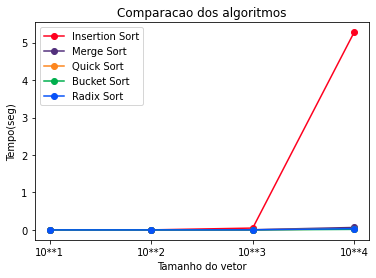

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import time

tamanho_vetor = 4
eixo_x = []
for i in range(1, tamanho_vetor+1):
  eixo_x.append('10**'+str(i))

insertion_y = testa_tempo(insertion_sort, tamanho_vetor)
print(f"insertion: {insertion_y}")
plt.plot(eixo_x, insertion_y, color='#fe011f', label='Insertion Sort', marker='o')

merge_y = testa_tempo(merge_sort, tamanho_vetor)
print(f"merge: {merge_y}")
plt.plot(eixo_x, merge_y, color='#52307c', label='Merge Sort', marker='o')

quick_y = testa_tempo(quick_sort, tamanho_vetor)
print(f"quick: {quick_y}")
plt.plot(eixo_x, quick_y, color='#fd861e', label='Quick Sort', marker='o')

bucket_y = testa_tempo(bucket_sort, tamanho_vetor)
print(f"bucket: {bucket_y}")
plt.plot(eixo_x, bucket_y, color='#00af4d', label='Bucket Sort', marker='o')

radix_y = testa_tempo(radix_sort, tamanho_vetor)
print(f"radix: {radix_y}")
plt.plot(eixo_x, radix_y, color='#0752f8', label='Radix Sort', marker='o')

plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo(seg)')
plt.title('Comparacao dos algoritmos')

plt.legend()

plt.show()

**Outras comparações**

<img src="https://github.com/italo-venancio/imagens/blob/main/grafico_04a.png?raw=true" alt="Grafico 10**4" width=500>


merge: [6.9e-05, 0.000794, 0.00708, 0.065355]

quick: [2.1e-05, 0.000173, 0.002316, 0.030279]

bucket: [2.5e-05, 0.000244, 0.001046, 0.011948]

radix: [4.5e-05, 0.000191, 0.002562, 0.035364]

<img src="https://github.com/italo-venancio/imagens/blob/main/grafico_07a.png?raw=true" alt="Grafico 10**7" width=500>


merge: [5.5e-05, 0.001168, 0.00582, 0.077226, 0.892769, 11.195962, 148.691278]

quick: [2.9e-05, 0.000161, 0.002267, 0.031822, 0.388885, 5.349087, 68.306587]

bucket: [2.8e-05, 0.000111, 0.001098, 0.011106, 0.194564, 2.821452, 31.352742]

radix: [8.7e-05, 0.00033, 0.00541, 0.033913, 0.47981, 8.049829, 105.307719]





